# Jobin Mathew - MovieLens Project

### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
# Here we will import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To allow for graph plotting inside Jupyter Notebook
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format  

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# Loading/Reading the required datasets

# User Rating Data
user_rating_data = pd.read_csv('Data.csv')

# Movie Data
movie_data = pd.read_csv('item.csv')

# User Data
user_data = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
# User Rating Data: Info & Shape

user_rating_data.info()
print("")
user_rating_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB



(100000, 4)

In [4]:
# With .isnull() & .sum() methods we are able to determine if there are any null values

print(f"There are {user_rating_data.isnull().sum().sum()} missing values in this dataframe.")

There are 0 missing values in this dataframe.


In [5]:
# User Rating Data: Describe

user_rating_data.describe()

,user id,movie id,rating,timestamp
count,"100,000.00","100,000.00","100,000.00","100,000.00"
mean,462.48,425.53,3.53,"883,528,851.49"
std,266.61,330.80,1.13,"5,343,856.19"
min,1.00,1.00,1.00,"874,724,710.00"
25%,254.00,175.00,3.00,"879,448,709.50"
50%,447.00,322.00,4.00,"882,826,944.00"
75%,682.00,631.00,4.00,"888,259,984.00"
max,943.00,"1,682.00",5.00,"893,286,638.00"


In [6]:
# Movie Data: Info and Shape

movie_data.info()
print("")
movie_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

(1681, 22)

In [7]:
print(f"There are {movie_data.isnull().sum().sum()} missing values in this dataframe.")

There are 0 missing values in this dataframe.


In [8]:
# Movie Data: Describe

movie_data.describe().T
# df.describe().T will give the transpose of the df.describe() method and provide an alternative way to read the dataframe description

,count,mean,std,min,25%,50%,75%,max
movie id,"1,681.00",841.84,485.64,1.00,422.00,842.00,"1,262.00","1,682.00"
unknown,"1,681.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00
Action,"1,681.00",0.15,0.36,0.00,0.00,0.00,0.00,1.00
Adventure,"1,681.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
Animation,"1,681.00",0.02,0.16,0.00,0.00,0.00,0.00,1.00
Childrens,"1,681.00",0.07,0.26,0.00,0.00,0.00,0.00,1.00
Comedy,"1,681.00",0.30,0.46,0.00,0.00,0.00,1.00,1.00
Crime,"1,681.00",0.06,0.25,0.00,0.00,0.00,0.00,1.00
Documentary,"1,681.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
Drama,"1,681.00",0.43,0.50,0.00,0.00,0.00,1.00,1.00


In [9]:
# User Data: Info and Shape

user_data.info()
print("")
user_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB



(943, 5)

In [10]:
print(f"There are {user_data.isnull().sum().sum()} missing values in this dataframe.")

There are 0 missing values in this dataframe.


In [11]:
# User Data: Describe

user_data.describe()

,user id,age
count,943.00,943.00
mean,472.00,34.05
std,272.36,12.19
min,1.00,7.00
25%,236.50,25.00
50%,472.00,31.00
75%,707.50,43.00
max,943.00,73.00


**Observations:**
1. There are no missing values in any of the dataframes.

2. The inconsistency in amount of Rows in user_rating_data, movie_data, and user_data indicate that there are either missing values or duplicate rows.

3. Due to obervation 1 it can be assumed that there are duplicate Rows in all 3 dataframes.

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [12]:
# To visualize the Data

movie_data.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# To create a new dataframe that is genre specific:

# First the duplicate entries in movie_data are removed with the df.drop_duplicates() method based upon the column 'movie title'
movie_data_nodup = movie_data.drop_duplicates(subset=['movie title'])
# Then a new df is created containing only the desired columns and their elements
movie_genres = movie_data_nodup.drop(['movie id', 'movie title', 'release date'],axis=1)

# A simple return function for each column of the df to sum all of the elements of each column label and then return the solutions

def col_sum(co):
    return sum(co)

movie_genres.apply(col_sum)

unknown          1
Action         249
Adventure      133
Animation       42
Childrens      119
Comedy         499
Crime          107
Documentary     50
Drama          715
Fantasy         22
Film-Noir       23
Horror          90
Musical         55
Mystery         59
Romance        242
Sci-Fi         100
Thriller       247
War             71
Western         27
dtype: int64

In [14]:
movie_genres.loc[:,'Action':'Western'].sum()

Action         249
Adventure      133
Animation       42
Childrens      119
Comedy         499
Crime          107
Documentary     50
Drama          715
Fantasy         22
Film-Noir       23
Horror          90
Musical         55
Mystery         59
Romance        242
Sci-Fi         100
Thriller       247
War             71
Western         27
dtype: int64

**Insights:**
From the sum of the columns it can easily be determined that all but a single movie's genre type is known and that 'Drama' is the most seen movie genre.


### 5. Drop the movie where the genre is unknown - 2.5 marks.

In [15]:
# Here only the 'unknown' movie genre will be shown

# This can be done by assigning a new variable only contain the desired column labels and their elements
unknown_genre = movie_data_nodup[['movie title','unknown']]

unknown_genre
# From the prior code it is known that there is only 1 instance of an unknown movie

,movie title,unknown
0,Toy Story,0
1,GoldenEye,0
2,Four Rooms,0
3,Get Shorty,0
4,Copycat,0
...,...,...
1675,Sweet Nothing,0
1676,Mat' i syn,0
1677,B. Monkey,0
1679,You So Crazy,0


In [16]:
# To verify the claim one can use the df.loc() method on a specified column(s) with the '==' operator to search for the desired Row

unknown_genre.loc[unknown_genre['unknown']==1]

,movie title,unknown
1371,Good Morning,1


In [17]:
# After the claim has been verified the '!=' oppertor can be used to filter out undesired Rows and the new df can be assigned to a variable

kn_movies = unknown_genre.loc[unknown_genre['unknown']!=1]

In [18]:
kn_movies

,movie title,unknown
0,Toy Story,0
1,GoldenEye,0
2,Four Rooms,0
3,Get Shorty,0
4,Copycat,0
...,...,...
1675,Sweet Nothing,0
1676,Mat' i syn,0
1677,B. Monkey,0
1679,You So Crazy,0


In [19]:
# The new df can further be verified against the original filter function

kn_movies.loc[kn_movies['unknown']==1]

,movie title,unknown


In [20]:
# Finally, the new df can be merged with the original with the argument how='inner' to retain the known movie genre integrity

kn_movies_nodup = kn_movies.drop_duplicates(subset=['movie title'])
known_movies_df = pd.merge(kn_movies_nodup,movie_data_nodup, how='inner', on='movie title')
known_movies_df

,movie title,unknown_x,movie id,release date,unknown_y,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,0,1,01-Jan-1995,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,0,2,01-Jan-1995,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Four Rooms,0,3,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,0,4,01-Jan-1995,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Copycat,0,5,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,Sweet Nothing,0,1677,20-Sep-1996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,Mat' i syn,0,1678,06-Feb-1998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1654,B. Monkey,0,1679,06-Feb-1998,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1655,You So Crazy,0,1681,01-Jan-1994,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Insights:**
All duplicate elements are from movies with known movie genres. With the df.loc() method and an operator it is possible to filter elements of a dataframe.

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [21]:
movie_data_nodup.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# To find movies with more than 1 genre a sum of each genre is needed with a function to filter results

# First it is beneficial to remove all elements that would alter the result
movie_genre_sum = movie_data_nodup.drop(['movie id','release date'],axis=1)
# The data can then be filtered using the .sum() method with the '>' operator
movie_genre_sum = movie_genre_sum[movie_genre_sum.sum(axis=1)>1]

In [23]:
# Then using the interior function from above a new column can be created to show all the totals of movies with more than one genre type

movie_genre_sum['Genre Count'] = movie_genre_sum.sum(axis=1)
# The data can be better seen with a sub-dataframe
movie_genre_count = movie_genre_sum[['movie title','Genre Count']]
movie_genre_count

,movie title,Genre Count
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1661,Nothing Personal,2
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2


In [24]:
# To determine how many movies have more than 1 movie genre a simple len() function can be used on the dataframe

print(f"There are {(len(movie_genre_count))} movies with more than 1 movie genre.")

There are 836 movies with more than 1 movie genre.


**Insights:**
When compared to movie_data_nodup it can be determined that around half of the movies in the dataset have more than 1 genre type.


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [25]:
user_data.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [26]:
user_data_nodup = user_data.drop_duplicates(subset=['user id'])

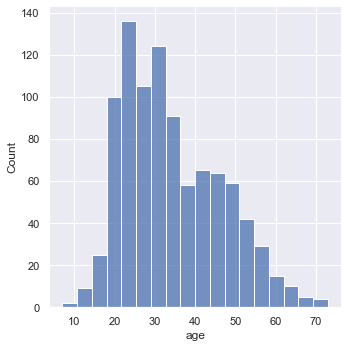

In [27]:
# Distplot for age:

sns.displot(user_data_nodup['age'])
plt.show()

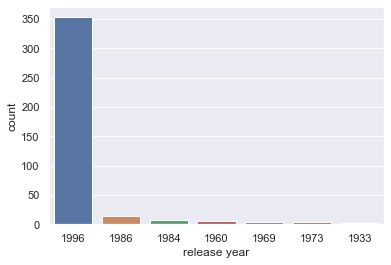

In [28]:
# Countplot for release year:

# In order to acquire the year from 'release date' the string must be converted into Pandas datetime format
movie_data_nodup['release year'] = pd.to_datetime(movie_data['release date'], format='%d-%b-%Y')
# After being convereted into the datetime format, the elements can be changed to only return the year
movie_data_nodup['release year'] = movie_data_nodup['release year'].dt.year
# The old column 'release date' is no longer needed
movie_year = movie_data_nodup.drop(['release date'],axis=1)
# To better visualize the countplot the order= argument can be used to return only a sequence of elements
sns.countplot(data=movie_year, x='release year', order=movie_year.value_counts(movie_year['release year']).iloc[0:1658:10].index)

plt.show()

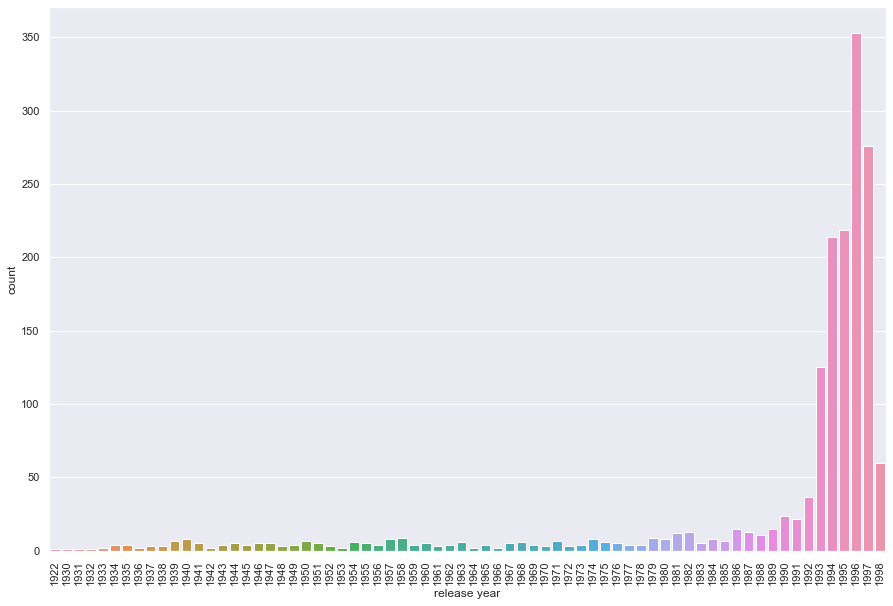

In [29]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.countplot(x = movie_year['release year'])
plt.show()

In [30]:
# Removing duplicate entries of user_rating_data

user_rating_data_nodup = user_rating_data.drop_duplicates(subset=['user id'])

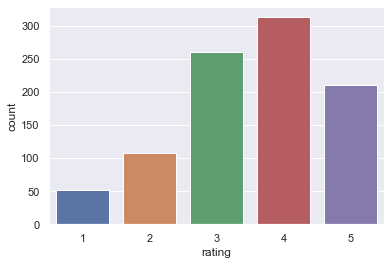

In [31]:
# Countplot for rating:

sns.countplot(data=user_rating_data_nodup, x='rating')
plt.show()

In [32]:
# Due to a large output of points on the scatterplot, it is more visually appealing to group the data by occupation and compare ages of those within the various occupations from the dataset

user_data_nodup_scat = user_data_nodup.groupby('occupation')
user_data_nodup_scat_avg = user_data_nodup_scat.mean()
# Seaborn appears to be unable to use column for a scatterplot if it is set as the index
user_data_nodup_scat_avg = user_data_nodup_scat_avg.reset_index()

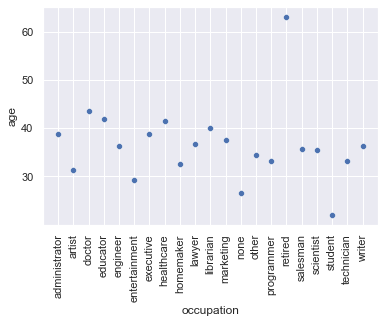

In [33]:
# Scatterplot for occupation and age:

sns.scatterplot(user_data_nodup_scat_avg['occupation'], user_data_nodup_scat_avg['age'])
plt.xticks(rotation = 90)
plt.show()

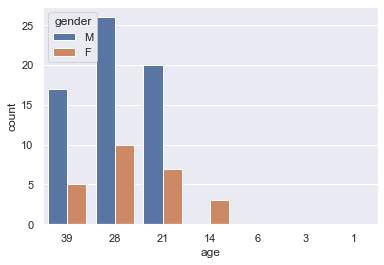

In [34]:
# Countplot for gender and age:

# The order= argument is useful to limit the amount of elements needed to be on the plot
sns.countplot(data=user_data_nodup, x='age', hue='gender', order=user_data_nodup.value_counts(user_data_nodup['age']).iloc[0:943:10])
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [35]:
movie_year.head()

,movie id,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995


In [36]:
# To construct a dataframe with a new index and new grouping

# Drop any undesired labels
movie_pop = movie_year.drop(['movie id'], axis=1)
# New index
movie_pop.set_index('release year', inplace=True)
# To sum all rows and store results in a new label
movie_pop['total'] = movie_pop.sum(axis=1)
# Grouping rows by desired label and summing simmilar index label
movie_pop_grouped = movie_pop.groupby('release year')
movie_popu = movie_pop_grouped.sum()
movie_popu.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
1933,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,3


In [37]:
# To acquire a df of percentages

movie_popularity = movie_popu.div(movie_popu['total'], axis=0) * 100
movie_popularity.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release year,,,,,,,,,,,,,,,,,,,,
1922,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
1930,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
1931,0.00,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,100.00
1932,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00,50.00,0.00,100.00
1933,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,33.33,0.00,100.00


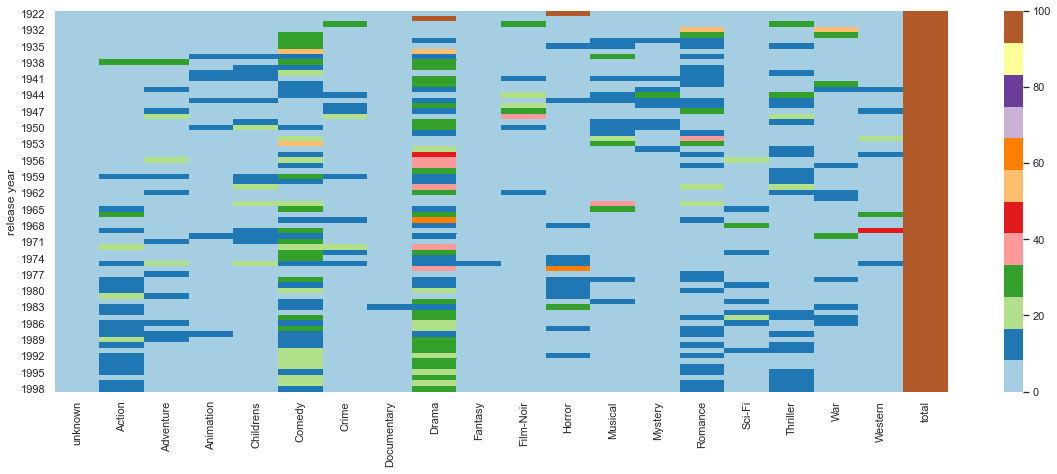

In [38]:
# Heatmap showing genre popularity change over the years based upon percentage

plt.figure(figsize=(20,7))
sns.heatmap(movie_popularity, annot=False, cmap="Paired")
plt.show()

**Insights:**
The Heatmap can show which genres have been repeatedly more popular by the appearance of color and verifies that Drama is the most popular movie genre.


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [39]:
user_rating_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [40]:
# The first step is to remove labels that are not needed and then to group the data by the necessary label

user_rating = user_rating_data.drop(['user id','timestamp'], axis=1)
# By setting 'movie_id' as the index the rows can be summed without worry of data error
user_rating.set_index('movie id', inplace=True)
user_rat_gr = user_rating.groupby('movie id')

In [41]:
# The data can then be summed and filtered as needed

# To sum the Rows
user_rat_sum = user_rat_gr.sum()
# The df is filtered to only ratings that are greater than 100
user_rat_100 = user_rat_sum[user_rat_sum['rating']>100]
# Renaming for clarity
user_rat_100 = user_rat_100.rename(columns={'rating': 'total ratings'})
user_rat_100

,total ratings
movie id,
1,1753
2,420
3,273
4,742
5,284
...,...
1217,112
1221,136
1226,108


In [42]:
# The df also will need to be averaged across the rows with prior grouping on 'movie id'

# To find the average across the rows
user_rat_avg = user_rat_gr.mean()
# Renaming for clarity
user_rat_avg = user_rat_avg.rename(columns= {'rating': 'average ratings'})
user_rat_avg

,average ratings
movie id,
1,3.88
2,3.21
3,3.03
4,3.55
5,3.30
...,...
1678,1.00
1679,3.00
1680,2.00


In [43]:
# Both dfs are then merged together to acquire the average ratings of movies with ratings greater than 100

movie_tot_avg = pd.merge(user_rat_100,user_rat_avg, how='left', on='movie id')
# To acquire the maximum values of the desired column in descending order
movie_tot_avg.sort_values(by=['average ratings'], ascending=False, inplace=True)
# To obtain only the top 25 Rows and their elements
top_25_nolabel = movie_tot_avg.iloc[0:25]
top_25_nolabel

,total ratings,average ratings
movie id,,
408,503,4.49
318,1331,4.47
169,527,4.47
483,1083,4.46
114,298,4.45
64,1258,4.45
603,917,4.39
12,1171,4.39
50,2541,4.36


In [44]:
# A new df created with 'movie id' as the index so that when merged titles of the movies will be aligned with their respective id

movie_identity = movie_data_nodup[['movie id','movie title']]
movie_identity.set_index('movie id', inplace=True)
movie_identity

,movie title
movie id,
1,Toy Story
2,GoldenEye
3,Four Rooms
4,Get Shorty
5,Copycat
...,...
1677,Sweet Nothing
1678,Mat' i syn
1679,B. Monkey


In [45]:
# The dataframes are merged to give the top 25 movies based on average ratings of movies that had ratings greater than 100

top_25 = pd.merge(top_25_nolabel,movie_identity, how='left', on='movie id')
top_25.reset_index(inplace=True)
top_25.set_index('movie title', inplace=True)
top_25

,movie id,total ratings,average ratings
movie title,,,
"Close Shave, A",408,503,4.49
Schindler's List,318,1331,4.47
"Wrong Trousers, The",169,527,4.47
Casablanca,483,1083,4.46
Wallace & Gromit: The Best of Aardman Animation,114,298,4.45
"Shawshank Redemption, The",64,1258,4.45
Rear Window,603,917,4.39
"Usual Suspects, The",12,1171,4.39
Star Wars,50,2541,4.36


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [46]:
# First it may be beneficial to revisit all of the dfs

movie_data_nodup.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


In [47]:
user_data_nodup.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [48]:
user_rating_data_nodup.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [49]:
# Prior to merging the dfs, the undesired column labels with their elements can be removed

user_rd = user_rating_data_nodup.drop(['rating','timestamp'], axis=1)
user_d = user_data_nodup.drop(['age','occupation','zip code'], axis=1)
movie_d = movie_data_nodup.drop(['release date','release year'], axis=1)

In [50]:
# The dfs can then be merged one at a time and then grouped by the variable of interest

user_combined = pd.merge(user_rd,user_d, how='outer', on='user id')
combined_df = pd.merge(movie_d,user_combined, how='outer', on='movie id')
# Removing labels that are no longer needed
combined_df.drop(['movie id','movie title','user id'], axis=1, inplace=True)
# Creating a new column to contain sum values across the Rows
combined_df['total'] = combined_df.sum(axis=1)
# Grouping the df by the Row/variable of interest by summation
gender_df = combined_df.groupby('gender')
gender_df_final = gender_df.sum()
gender_df_final

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,,
F,0.00,57.00,25.00,12.00,20.00,85.00,25.00,0.00,117.00,0.00,2.00,17.00,16.00,22.00,66.00,19.00,59.00,29.00,1.00,572.00
M,0.00,184.00,87.00,24.00,45.00,193.00,57.00,6.00,260.00,10.00,12.00,30.00,34.00,44.00,130.00,86.00,174.00,63.00,10.00,"1,449.00"


In [51]:
# Acquisition of Male and Female values of specified genre types

total_f = gender_df_final.iloc[0]['total']
total_m = gender_df_final.iloc[1]['total']
drama_f = gender_df_final.iloc[0]['Drama']
drama_m = gender_df_final.iloc[1]['Drama']
scifi_f = gender_df_final.iloc[0]['Sci-Fi']
scifi_m = gender_df_final.iloc[1]['Sci-Fi']
roman_f = gender_df_final.iloc[0]['Romance']
roman_m = gender_df_final.iloc[1]['Romance']

In [52]:
# if/else statements with f-strings and the previously created variables make an efficient way to produce a print statement with the result of comparison of percentages.

print(f"Do men watch more Dramatic Movies compared to women? Lets find out!")
m_drama_perc = (drama_m/total_m)*100
f_drama_perc = (drama_f/total_f)*100
print("")
if m_drama_perc > f_drama_perc:
    print(f"{round(m_drama_perc)}% of men that watch movies watch Dramatic Movies while only {round(f_drama_perc)}% of women that watch movies watch Dramatic Movies.")
else:
    print(f"Only {round(m_drama_perc)}% of men that watch movies watch Dramatic Movies while {round(f_drama_perc)}% of women that watch movies watch Dramatic Movies.")

Do men watch more Dramatic Movies compared to women? Lets find out!

Only 18% of men that watch movies watch Dramatic Movies while 20% of women that watch movies watch Dramatic Movies.


In [53]:
print(f"Do women watch more Sci-Fi Movies compared to men? Lets find out!")
m_scifi_perc = (scifi_m/total_m)*100
f_scifi_perc = (scifi_f/total_f)*100
print("")
if f_scifi_perc > m_scifi_perc:
        print(f"{round(f_scifi_perc)}% of women that watch movies watch Sci-Fi Movies while only {round(m_scifi_perc)}% of men that watch movies watch Sci-Fi Movies.")
else:
    print(f"Only {round(f_scifi_perc)}% of women that watch movies watch Sci-Fi Movies while {round(m_scifi_perc)}% of men that watch movies watch Sci-Fi Movies.")

Do women watch more Sci-Fi Movies compared to men? Lets find out!

Only 3% of women that watch movies watch Sci-Fi Movies while 6% of men that watch movies watch Sci-Fi Movies.


In [54]:
print(f"Do men watch more Romantic Movies compared to women? Lets find out!")
m_roman_perc = (roman_m/total_m)*100
f_roman_perc = (roman_f/total_f)*100
print("")
if m_roman_perc > f_roman_perc:
        print(f"{round(m_roman_perc)}% of men that watch movies watch Romantic Movies while only {round(f_roman_perc)}% of women that watch movies watch Romantic Movies.")
else:
    print(f"Only {round(m_roman_perc)}% of men that watch movies watch Romantic Movies while {round(f_roman_perc)}% of women that watch movies watch Romantic Movies.")

Do men watch more Romantic Movies compared to women? Lets find out!

Only 9% of men that watch movies watch Romantic Movies while 12% of women that watch movies watch Romantic Movies.
